
# Auto mpg

Importing required libraries

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Let's import the dataset auto-mpg.csv and explote it. Check the structure of the data by inspecting the number of rows, columns, and attributes of the dataset. You can use functions like .shape, .head(), .info(), and .describe() to get a quick overview of the data.

In [46]:
df=pd.read_csv('auto-mpg.csv')

1) Compute the correlation matrix

In [47]:
df.replace('?', np.nan, inplace=True)

In [48]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [50]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [51]:
df.dropna(inplace=True)

In [52]:
numeric_df = df.drop(['car name'], axis=1)


Correlation Matrix:


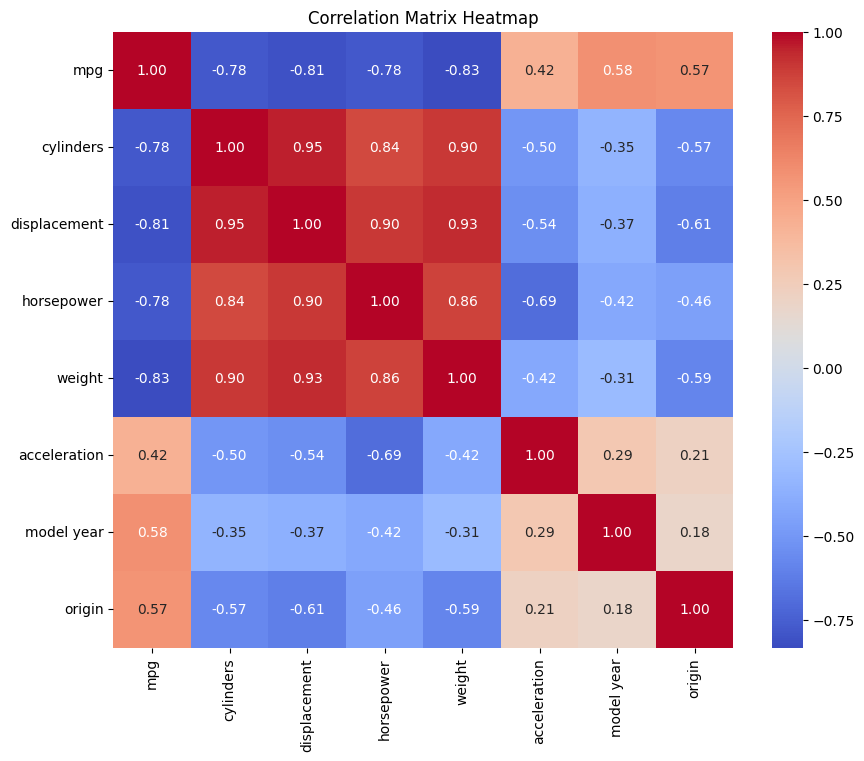

In [54]:
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

2) Use train_test_split to split the data into training and testing sets. Split the dataset in 80% training, 20% testing, and random_state=0

In [55]:
X=df[[ "cylinders", "displacement", "weight"]]
y=df.mpg

In [56]:
from sklearn.model_selection import train_test_split

random_state = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

3) Let's estimate the regression line between **mpg **and the three variable with the highest correlation coefficient ("cylinders", "displacement", "weight").

In [57]:
X_train=X_train[[ "cylinders", "displacement", "weight"]]
X_test=X_test[[ "cylinders", "displacement", "weight"]]

In [58]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

4) It's time to train the linear regression model using the training dataset.

In [59]:
lr.fit(X_train,y_train)

LinearRegression()

5) Use the trained model to make predictions on the test data. Store the prediction in y_pred.

In [60]:
y_pred = lr.predict(X_test)